In [61]:
import os
import zipfile
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## Unziping files

In [62]:
path_to_zip_file = '../data/raw/ml-100k.zip'
directory_to_extract_to = '../data/interim'

with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [63]:
extracted_path = directory_to_extract_to + '/ml-100k'

## Checking unzipped directory structure

In [64]:
for _, dirs, files in os.walk(extracted_path):
    if not len(files) == 0:
        print('Files:')
        for file in files:
                print('\t', file)
    else:
        print('No files in the root of dataset')
    print()
    if not len(dirs) == 0:
        print('Directories:')
        for _dir in dirs:
                print('\t', _dir)
    else:
        print('No directories in the root of dataset')

Files:
	 allbut.pl
	 mku.sh
	 README
	 u.data
	 u.genre
	 u.info
	 u.item
	 u.occupation
	 u.user
	 u1.base
	 u1.test
	 u2.base
	 u2.test
	 u3.base
	 u3.test
	 u4.base
	 u4.test
	 u5.base
	 u5.test
	 ua.base
	 ua.test
	 ub.base
	 ub.test

No directories in the root of dataset


## Checking data quality

According to README:

These are tab separated lists:
* u.data     -- The full u data set, 100000 ratings by 943 users on 1682 items.
* u.item     -- Information about the items (movies).
* u.user     -- Demographic information about the users.

Additional files that are interesting for us
* u.info     -- The number of users, items, and ratings in the u data set.
* u.genre    -- A list of the genres.
* u.occupation -- A list of the occupations.


All other files are just splits of dataset or scripts for generation of these datasets. We will not consider these file during data quality check, since all data stored in the files listed earlier.

### Ratings

In [65]:
ratings = pd.read_csv(extracted_path + '/u.data', delimiter='\t', names=['user id', 'item id', 'rating', 'timestamp'])
ratings

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [66]:
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   item id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None


In [67]:
print(ratings.isnull().any())

user id      False
item id      False
rating       False
timestamp    False
dtype: bool


### Genres

In [68]:
genres = pd.read_csv(extracted_path + '/u.genre', delimiter='|', index_col=1, names=['Genres'])
genres

,Genres
0,unknown
1,Action
2,Adventure
3,Animation
4,Children's
5,Comedy
6,Crime
7,Documentary
8,Drama
9,Fantasy


### Occupation

In [69]:
occupation = pd.read_csv(extracted_path + '/u.occupation', delimiter='\t')
occupation

,administrator
0,artist
1,doctor
2,educator
3,engineer
4,entertainment
5,executive
6,healthcare
7,homemaker
8,lawyer
9,librarian


### Movies

In [70]:
genres_list = genres['Genres'].values.tolist()
movies = pd.read_csv(extracted_path + '/u.item', delimiter='|', names=['movie id', 'movie title', 'release date', 'video release date', 'IMDb URL'] + genres_list, encoding='ANSI', index_col=0)
movies

,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [71]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1682 entries, 1 to 1682
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie title         1682 non-null   object 
 1   release date        1681 non-null   object 
 2   video release date  0 non-null      float64
 3   IMDb URL            1679 non-null   object 
 4   unknown             1682 non-null   int64  
 5   Action              1682 non-null   int64  
 6   Adventure           1682 non-null   int64  
 7   Animation           1682 non-null   int64  
 8   Children's          1682 non-null   int64  
 9   Comedy              1682 non-null   int64  
 10  Crime               1682 non-null   int64  
 11  Documentary         1682 non-null   int64  
 12  Drama               1682 non-null   int64  
 13  Fantasy             1682 non-null   int64  
 14  Film-Noir           1682 non-null   int64  
 15  Horror              1682 non-null   int64  
 16  Musical    

We can see that there is no 'video release date' data for each film.

In [72]:
print(movies.isnull().any())

movie title           False
release date           True
video release date     True
IMDb URL               True
unknown               False
Action                False
Adventure             False
Animation             False
Children's            False
Comedy                False
Crime                 False
Documentary           False
Drama                 False
Fantasy               False
Film-Noir             False
Horror                False
Musical               False
Mystery               False
Romance               False
Sci-Fi                False
Thriller              False
War                   False
Western               False
dtype: bool


Except 'video release date', there are some missing data in 'release data' and ' IMDb URL' column. Let's display films with these gaps.

In [73]:
movies[movies.drop('video release date', axis=1).isnull().any(axis=1)]

,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,,,,
267,unknown,NaN,NaN,NaN,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1358,The Deadly Cure (1996),16-Sep-1996,NaN,NaN,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1359,Boys in Venice (1996),24-Sep-1996,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Users

In [74]:
users = pd.read_csv(extracted_path +'/u.user', delimiter='|', names=['user id', 'age', 'gender', 'occupation', 'zip code'], index_col=0)
users

,age,gender,occupation,zip code
user id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
...,...,...,...,...
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229


In [75]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 943 entries, 1 to 943
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         943 non-null    int64 
 1   gender      943 non-null    object
 2   occupation  943 non-null    object
 3   zip code    943 non-null    object
dtypes: int64(1), object(3)
memory usage: 36.8+ KB


In [76]:
users.isnull().any()

age           False
gender        False
occupation    False
zip code      False
dtype: bool

## Data analysis

Text(0.5, 0, 'year')

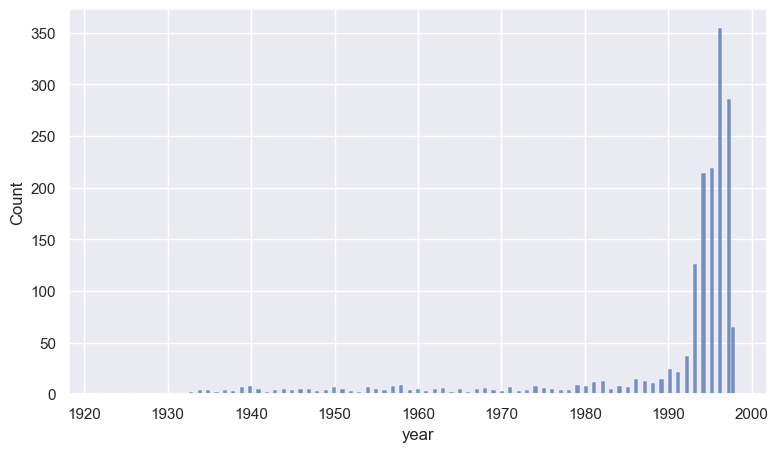

In [85]:
import datetime
import seaborn as sb

years = []

for date in movies['release date'].values:
    if not pd.isna(date):
        year = datetime.datetime.strptime(date, '%d-%b-%Y').year
        years.append(year)

sb.set(rc={'figure.figsize':(9,5)})
plot = sb.histplot(x=years)
plot.set_xlabel('year')

<Axes: ylabel='count'>

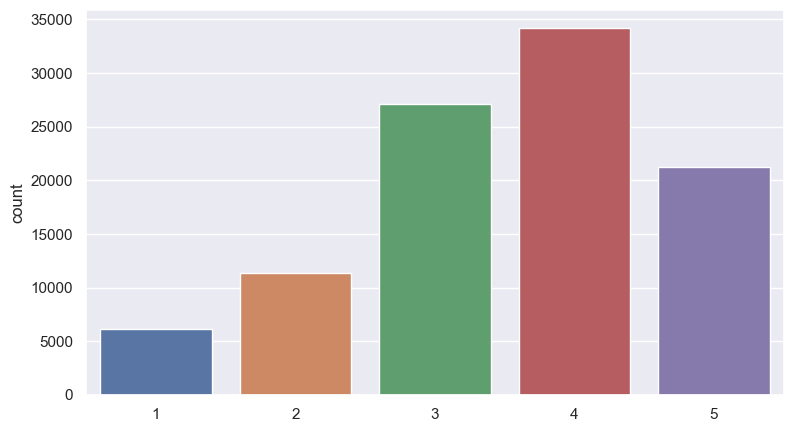

In [78]:
# sb.set(rc={'figure.figsize':(4,3)})
sb.countplot(x=ratings['rating'].values.tolist())

<Axes: xlabel='age', ylabel='Count'>

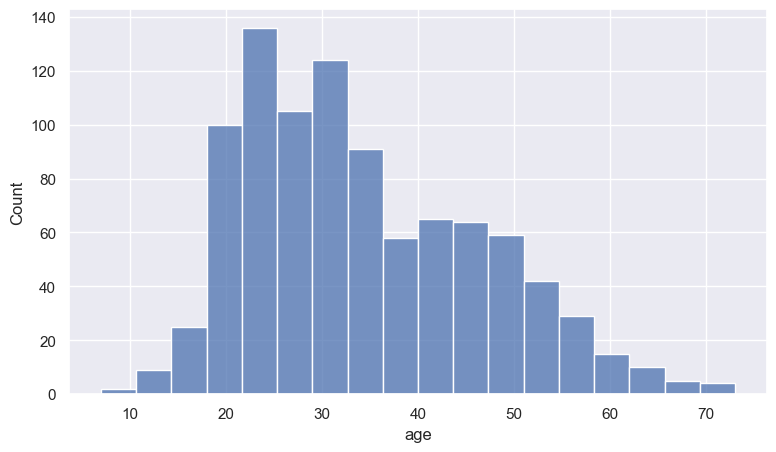

In [79]:
sb.histplot(x=users['age'])

<Axes: xlabel='gender', ylabel='count'>

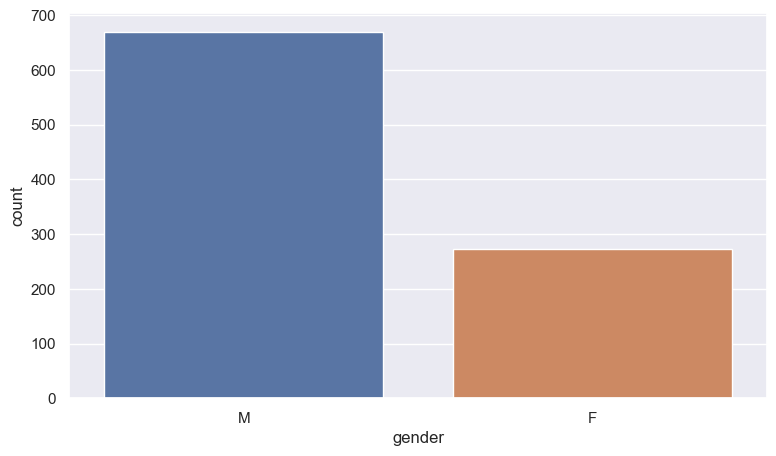

In [80]:
sb.countplot(users, x='gender')

<Axes: xlabel='count', ylabel='occupation'>

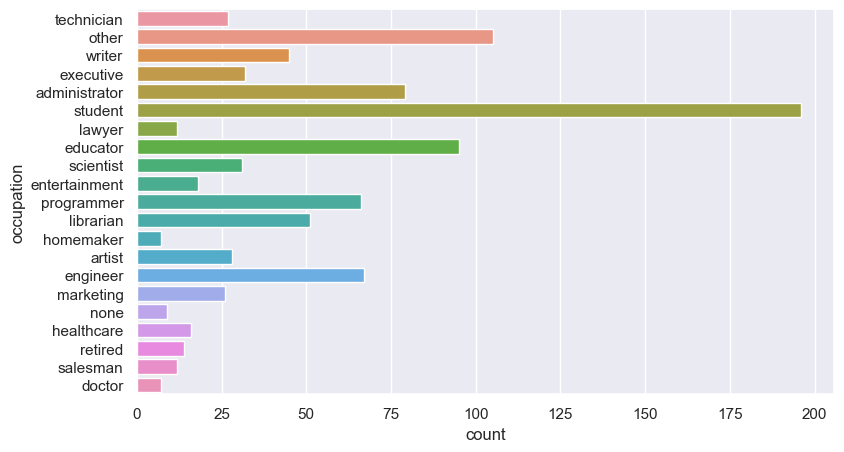

In [81]:
sb.countplot(users, y='occupation')

<Axes: >

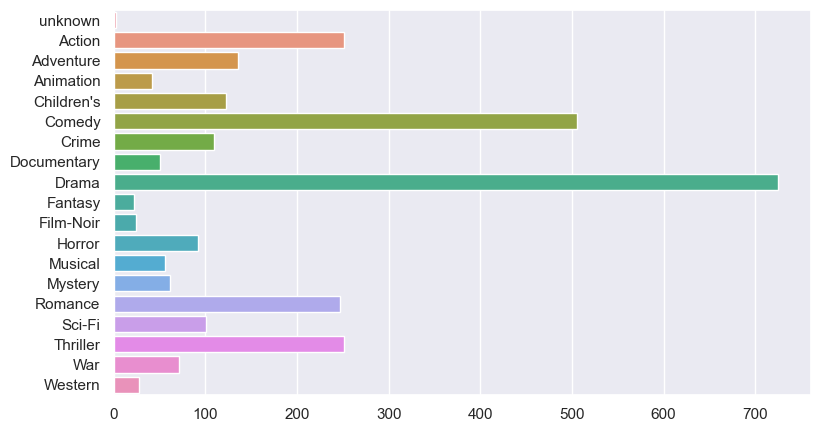

In [83]:
genres_count = {}
for genre in genres_list:
    genres_count[genre] = movies[genre].sum()
sb.barplot(y=list(genres_count.keys()), x=list(genres_count.values()))